In [1]:
import pandas as pd
import numpy as np
import math

In [138]:
train_x = pd.DataFrame(np.load('train_data.npy'))
train_y = pd.DataFrame(np.load('train_labels.npy'))
test_x = pd.DataFrame(np.load('eval_data.npy'))
test_y = pd.DataFrame(np.load('eval_labels.npy'))

In [139]:
# 先確認是否有空值
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174461 entries, 0 to 1174460
Data columns (total 70 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1174461 non-null  float64
 1   1       1174461 non-null  float64
 2   2       1174461 non-null  float64
 3   3       1174461 non-null  float64
 4   4       1174461 non-null  float64
 5   5       1174461 non-null  float64
 6   6       1174461 non-null  float64
 7   7       1174461 non-null  float64
 8   8       1174461 non-null  float64
 9   9       1174461 non-null  float64
 10  10      1174461 non-null  float64
 11  11      1174461 non-null  float64
 12  12      1174461 non-null  float64
 13  13      1174461 non-null  float64
 14  14      1174461 non-null  float64
 15  15      1174461 non-null  float64
 16  16      1174461 non-null  float64
 17  17      1174461 non-null  float64
 18  18      1174461 non-null  float64
 19  19      1174461 non-null  float64
 20  20      1174461 non-null

In [140]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175302 entries, 0 to 1175301
Data columns (total 70 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1175302 non-null  float64
 1   1       1175302 non-null  float64
 2   2       1175302 non-null  float64
 3   3       1175302 non-null  float64
 4   4       1175302 non-null  float64
 5   5       1175302 non-null  float64
 6   6       1175302 non-null  float64
 7   7       1175302 non-null  float64
 8   8       1175302 non-null  float64
 9   9       1175302 non-null  float64
 10  10      1175302 non-null  float64
 11  11      1175302 non-null  float64
 12  12      1175302 non-null  float64
 13  13      1175302 non-null  float64
 14  14      1175302 non-null  float64
 15  15      1175302 non-null  float64
 16  16      1175302 non-null  float64
 17  17      1175302 non-null  float64
 18  18      1175302 non-null  float64
 19  19      1175302 non-null  float64
 20  20      1175302 non-null

In [141]:
view = train_x.describe()

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='count'>

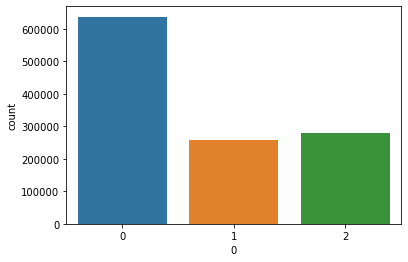

In [142]:
# 觀察 label 分布
import seaborn as sns
sns.countplot(train_y[0])

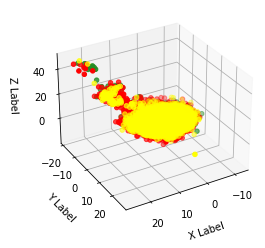

In [143]:
normalized_df=(train_x-train_x.mean())/train_x.std()

from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X_reduced = PCA(n_components = 3).fit_transform(normalized_df.values)

col = ['red','yellow','forestgreen']

fig = plt.figure()
ax = fig.add_subplot(111,projection ='3d')

#X_reduced = X_reduced [0:1476]

# add zaxis for the third dimension.
for y , color in zip([0,1,2], col):
    xs = X_reduced[train_y[0] == y].T[0]
    ys = X_reduced[train_y[0] == y].T[1]
    zs = X_reduced[train_y[0] == y].T[2]
    ax.scatter(xs, ys, zs, c = color,  marker='o')

ax.view_init(30, 60)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()


C:\Users\kevin\AppData\Local\Temp/ipykernel_5904/644995981.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


precision(0, 1, 2): [0.69987547 0.42834477 0.43841182]
recall score(0, 1, 2): [0.0056458  0.99045595 0.99367639]
training score : 0.6629829039923159
testing score : 0.4347233772020696


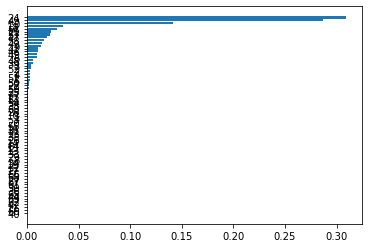

In [197]:

## 簡單使用RFC確認raw data訓練的效果，並當作baseline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

def RF_training(X , Y):
    test_ratio = 0.3
    X_train = X [math.ceil(len(X)*test_ratio) :]
    X_test = X [ : math.ceil(len(X)*test_ratio)]

    y_train = Y[math.ceil(len(X)*test_ratio) :]
    y_test = Y[ : math.ceil(len(X)*test_ratio)]

    ros = RandomOverSampler(random_state = 40)
    X_train, y_train = ros.fit_resample(X_train, y_train)

    model = RandomForestClassifier(n_estimators=50, max_depth=5,random_state=42)

    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)

    y_train_pred = model.predict(X_train)
    precision, recall, f1, _ = score(y_test, y_test_pred)
    print ( "precision(0, 1, 2):" ,precision )    
    print ( "recall score(0, 1, 2):" ,recall )
    Y_train_pre = model.predict(X_train)
    print('training score :' , accuracy_score(y_train, Y_train_pre))
    print('testing score :' , accuracy_score(y_test, y_test_pred))


    confusion_matrix(y_train, Y_train_pre)

    confusion_matrix(y_test, y_test_pred)

    from matplotlib import pyplot as plt
    def f_importances(coef, names):
        imp = coef
        imp,names = zip(*sorted(zip(imp,names)))
        plt.barh(range(len(names)), imp, align='center')
        plt.yticks(range(len(names)), names)
        plt.show()

    f_importances(model.feature_importances_, X)
    return model

model = RF_training( train_x , train_y )


In [162]:
drop_label = X.columns[model.feature_importances_ < 0.05]
X_refactor = train_x.drop(columns=drop_label, axis = 1)

In [166]:
X_refactor['over24'] = (X_refactor[24]> view[24][1])*1

In [167]:
X_refactor

,2,24,49,54,55,over24
0,0.142649,0.746444,0.349136,0.190231,0.0,1
1,0.142649,0.974448,0.349136,0.190231,0.0,1
2,0.142649,0.726897,0.456513,0.190231,0.0,1
3,0.142649,0.829814,1.077650,0.190231,0.0,1
4,0.142649,1.032305,0.349136,0.190231,0.0,1
...,...,...,...,...,...,...
1174456,-0.241619,0.634108,0.672387,2.724936,0.0,1
1174457,-0.241619,1.291386,0.290867,2.724936,0.0,1
1174458,-0.241619,0.846840,1.073458,2.724936,0.0,1
1174459,-0.241619,0.714985,1.131464,2.724936,0.0,1


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
X = X_refactor
Y = train_y

test_ratio = 0.3
X_train = X [math.ceil(len(X)*test_ratio) :]
X_test = X [ : math.ceil(len(X)*test_ratio)]

y_train = Y[math.ceil(len(X)*test_ratio) :]
y_test = Y[ : math.ceil(len(X)*test_ratio)]

# ros = RandomOverSampler(random_state = 40)
# X_train, y_train = ros.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)

model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
precision, recall, f1, _ = score(y_test, y_test_pred)
print ( "precision(0, 1, 2):" ,precision )    
print ( "recall score(0, 1, 2):" ,recall )
Y_train_pre = model.predict(X_train)
print('training score :' , accuracy_score(y_train, Y_train_pre))
print('testing score :' , accuracy_score(y_test, y_test_pred))


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kevin\AppData\Local\Temp/ipykernel_14272/2363170985.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


precision(0, 1, 2): [0.59776481 0.54311263 0.51783274]
recall score(0, 1, 2): [0.78771486 0.31737694 0.30543554]


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


training score : 0.5716657625024023
testing score : 0.5804466720970429


In [114]:
confusion_matrix(y_train, Y_train_pre)

array([[341497,  43715,  52746],
       [121533,  61463,     82],
       [134038,     29,  67019]], dtype=int64)

In [115]:
confusion_matrix(y_test, y_test_pred)

array([[156823,  19711,  22552],
       [ 50399,  23444,     25],
       [ 55127,     11,  24247]], dtype=int64)

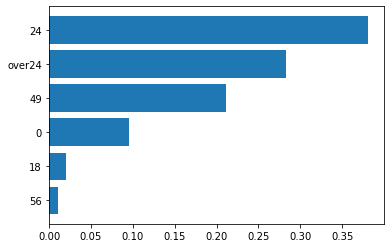

In [116]:
f_importances(model.feature_importances_, X_refactor.columns)

In [169]:
X_refactor_with_label = X_refactor.copy()

X_refactor_with_label['label'] = train_y

##  look into each columns

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '24 vs one and zero when below mean')

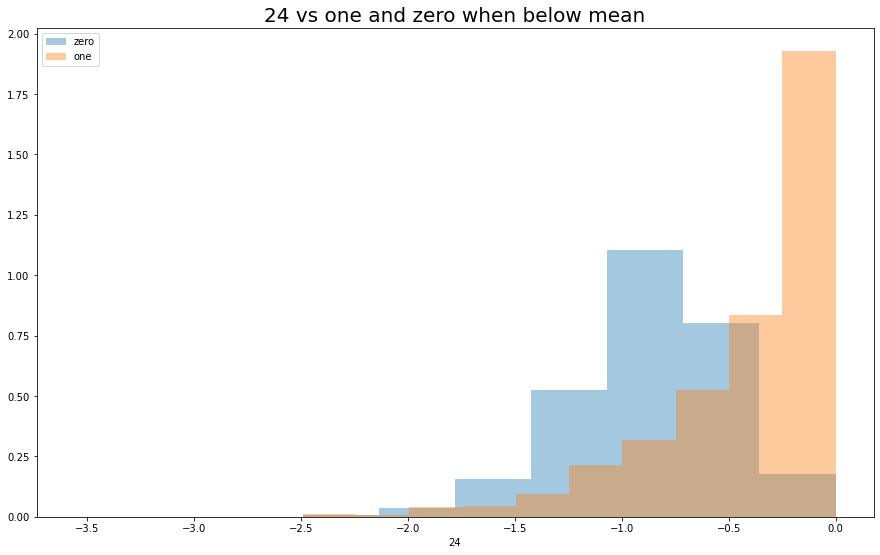

In [198]:
# mask with below part
mask_below_24_zero = ((X_refactor_with_label.over24 ==0 ) &(X_refactor_with_label.label == 0))
mask_below_24_one = ((X_refactor_with_label.over24 ==0 ) &(X_refactor_with_label.label == 1))
# plot 
fig, ax = plt.subplots( figsize = (15,9))
ax = sns.distplot(X_refactor_with_label.loc[mask_below_24_zero , 24], kde = False, bins=10, norm_hist = True, label = 'zero')
ax = sns.distplot(X_refactor_with_label.loc[mask_below_24_one , 24], kde = False, bins=10 , norm_hist = True, label = 'one')
ax.legend()
ax.set_title('24 vs one and zero when below mean', fontsize = 20)

Text(0.5, 1.0, '24 vs one and zero when over mean')

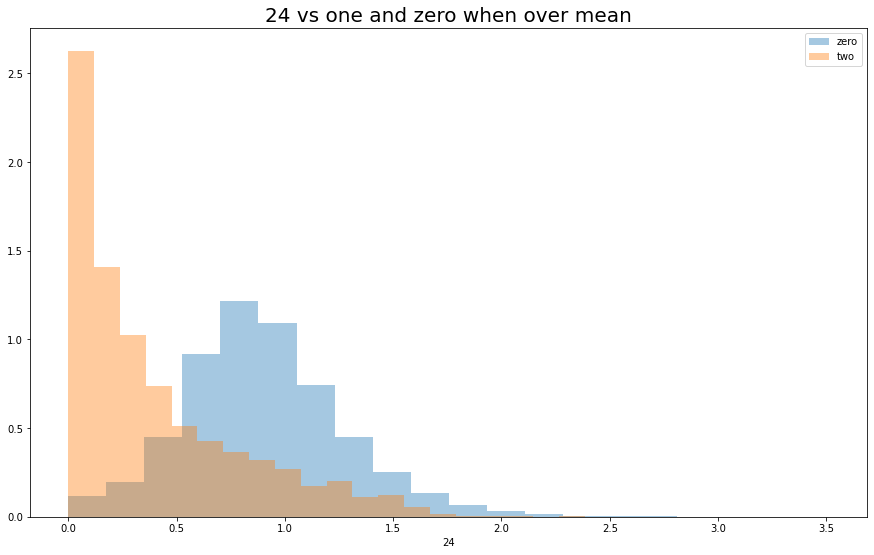

In [218]:
# mask with below part
mask_over_24_zero = ((X_refactor_with_label.over24 ==1 ) &(X_refactor_with_label.label == 0))
mask_over_24_two = ((X_refactor_with_label.over24 ==1 ) &(X_refactor_with_label.label == 2))
# plot 
fig, ax = plt.subplots( figsize = (15,9))
ax = sns.distplot(X_refactor_with_label.loc[mask_over_24_zero , 24], kde = False, bins=20, norm_hist = True, label = 'zero')
ax = sns.distplot(X_refactor_with_label.loc[mask_over_24_two , 24], kde = False, bins=20, norm_hist = True, label = 'two')
ax.legend()
ax.set_title('24 vs one and zero when over mean', fontsize = 20)

In [220]:
train_y[ X_refactor_with_label.over24 ==1 ].value_counts()

0    312192
1    254512
2      2822
dtype: int64

In [228]:
train_y[ (X_refactor['24_over'] == 1)&(X_refactor['over24'] == 1) ].value_counts()

0    275343
1    237591
2       836
dtype: int64

In [227]:
X_refactor['24_below'] = (X_refactor[24]< -0.5) *1 
X_refactor['24_over'] = (X_refactor[24]> 0.5) *1 

Text(0.5, 1.0, '49 vs one and zero when below mean')

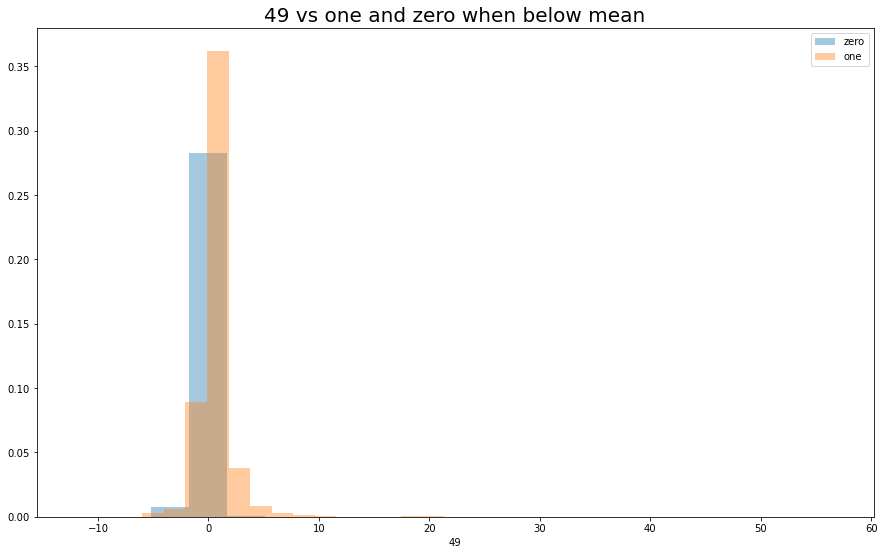

In [20]:
# mask with below part
mask_below_49_zero = ((X_refactor_with_label.over24 ==0 ) &(X_refactor_with_label.label == 0))
mask_below_49_one = ((X_refactor_with_label.over24 ==0 ) &(X_refactor_with_label.label == 1))
# plot 
fig, ax = plt.subplots( figsize = (15,9))
ax = sns.distplot(X_refactor_with_label.loc[mask_below_49_zero , 49], kde = False, bins=20, norm_hist = True, label = 'zero')
ax = sns.distplot(X_refactor_with_label.loc[mask_below_49_one , 49], kde = False, bins=20, norm_hist = True, label = 'one')
ax.legend()
ax.set_title('49 vs one and zero when below mean', fontsize = 20)

Text(0.5, 1.0, '49 vs two and zero when over mean')

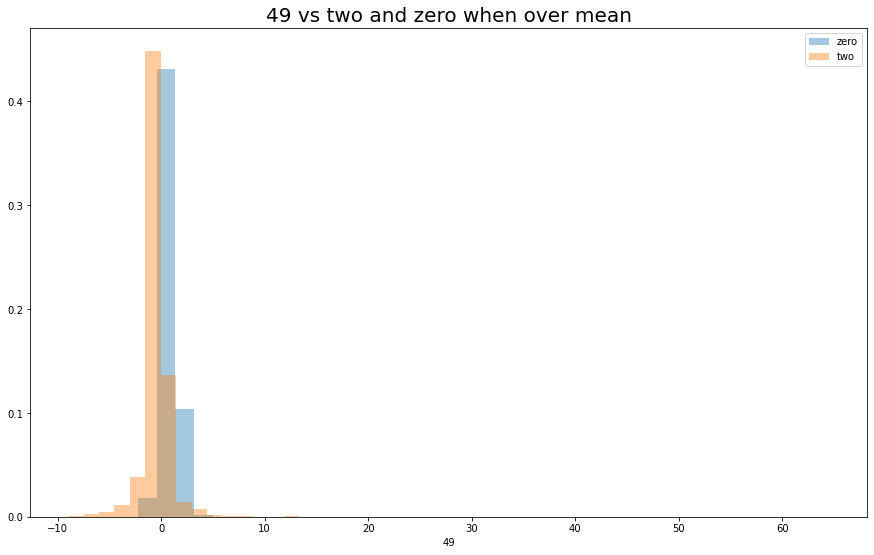

In [123]:
# mask with below part
mask_over_49_zero = ((X_refactor_with_label.over24 ==1 ) &(X_refactor_with_label.label == 0))
mask_over_49_two = ((X_refactor_with_label.over24 ==1 ) &(X_refactor_with_label.label == 2))
# plot 
fig, ax = plt.subplots( figsize = (15,9))
ax = sns.distplot(X_refactor_with_label.loc[mask_over_49_zero , 49], kde = False, bins=40, norm_hist = True, label = 'zero')
ax = sns.distplot(X_refactor_with_label.loc[mask_over_49_two , 49], kde = False, bins=40, norm_hist = True, label = 'two')
ax.legend()
ax.set_title('49 vs two and zero when over mean', fontsize = 20)

In [22]:
X_refactor['49_below'] = ((X_refactor[49]< 0) & (X_refactor_with_label.over24 ==1 )) *1 
X_refactor['49_over'] = ((X_refactor[49]> 0) & (X_refactor_with_label.over24 ==0 )) *1 

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '18 vs one and zero when over mean')

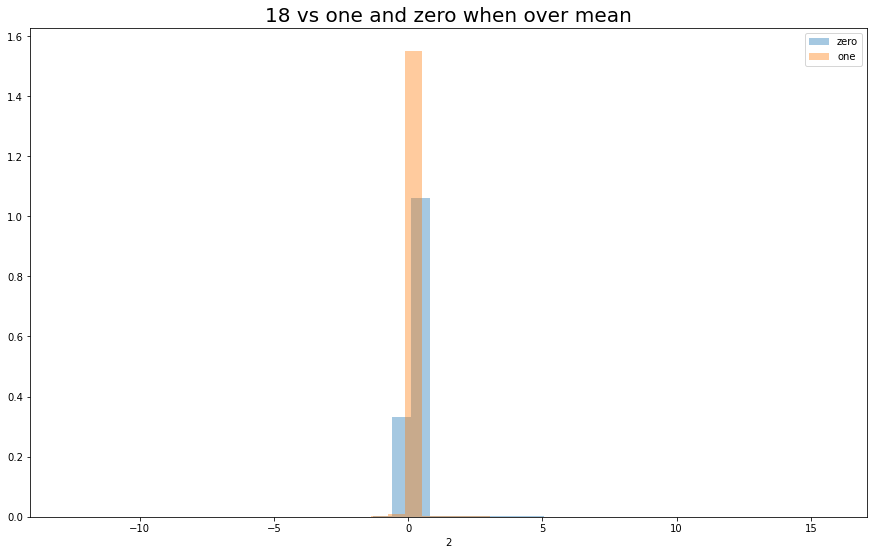

In [170]:
# mask with below part
mask_over_2_zero = ((X_refactor_with_label.over24 ==1 ) &(X_refactor_with_label.label == 0))
mask_over_2_one = ((X_refactor_with_label.over24 ==1 ) &(X_refactor_with_label.label == 1))
# plot 
fig, ax = plt.subplots( figsize = (15,9))
ax = sns.distplot(X_refactor_with_label.loc[mask_over_18_zero , 2], kde = False, bins=40, norm_hist = True, label = 'zero')
ax = sns.distplot(X_refactor_with_label.loc[mask_over_18_one , 2], kde = False, bins=40, norm_hist = True, label = 'one')
ax.legend()
ax.set_title('18 vs one and zero when over mean', fontsize = 20)

Text(0.5, 1.0, '18 vs two and zero when over mean')

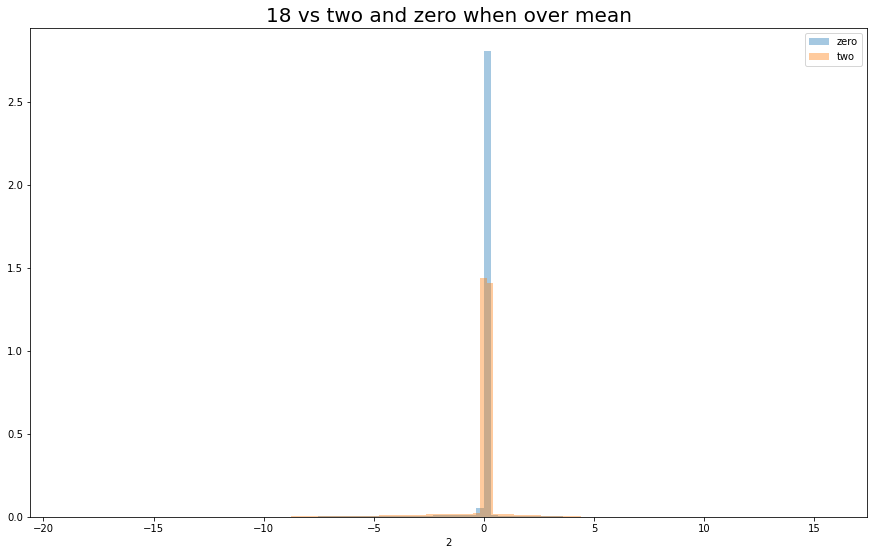

In [173]:
# mask with below part
mask_over_18_zero = (X_refactor_with_label.label == 0)
mask_over_18_two = (X_refactor_with_label.label == 2)
# plot 
fig, ax = plt.subplots( figsize = (15,9))
ax = sns.distplot(X_refactor_with_label.loc[mask_over_18_zero , 2], kde = False, bins=50, norm_hist = True, label = 'zero')
ax = sns.distplot(X_refactor_with_label.loc[mask_over_18_two , 2], kde = False, bins=50, norm_hist = True, label = 'two')
ax.legend()
ax.set_title('18 vs two and zero when over mean', fontsize = 20)

In [25]:
X_refactor['18_over'] = ((X_refactor[18]> 0) & (X_refactor_with_label.over24 ==1 )) *1 

In [194]:
train_y[train_x[2] < 0].value_counts()

0    43745
2    30867
1     8448
dtype: int64

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '0 vs one and zero when over mean')

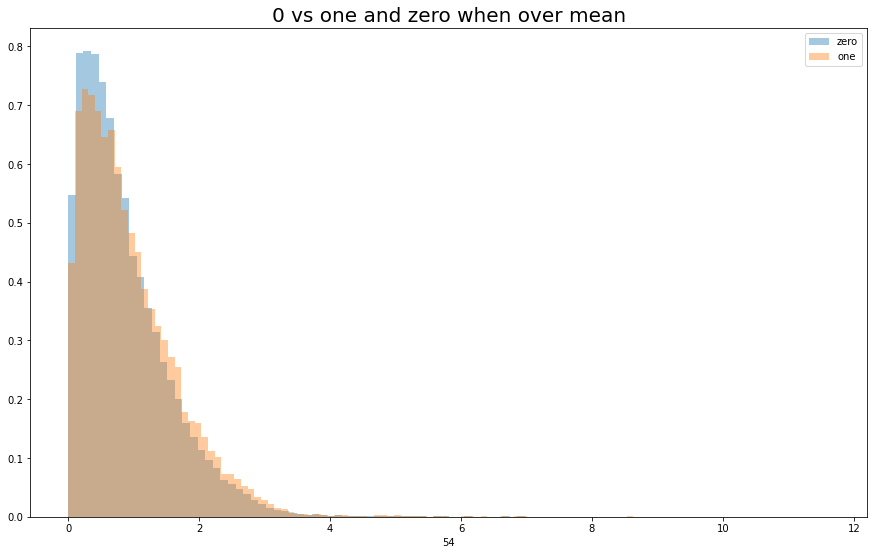

In [191]:
# mask with below part
mask_over_0_zero = (X_refactor_with_label.label == 0)
mask_over_0_one = (X_refactor_with_label.label == 1)
# plot 
fig, ax = plt.subplots( figsize = (15,9))
ax = sns.distplot(X_refactor_with_label.loc[mask_over_0_zero , 54], kde = False, bins=100, norm_hist = True, label = 'zero')
ax = sns.distplot(X_refactor_with_label.loc[mask_over_0_one , 54], kde = False, bins=100, norm_hist = True, label = 'one')
ax.legend()
ax.set_title('0 vs one and zero when over mean', fontsize = 20)

Text(0.5, 1.0, '55 vs two and zero when over mean')

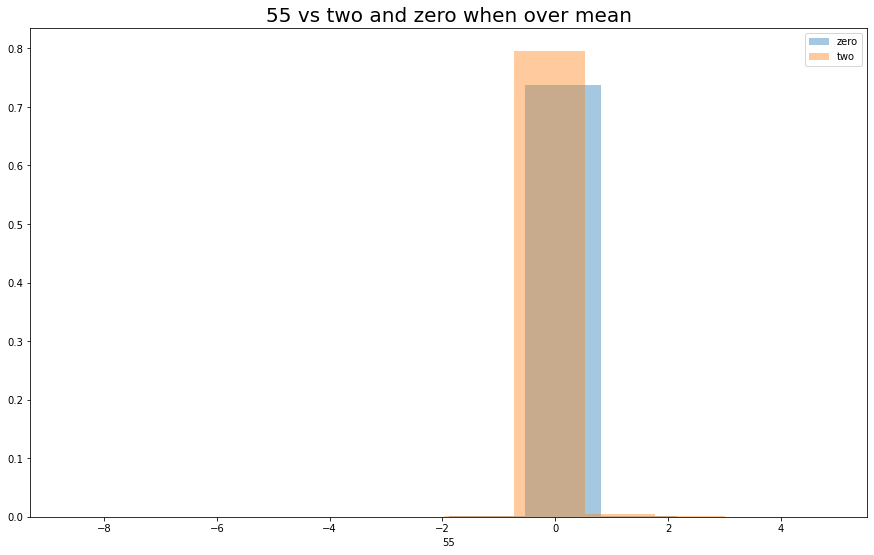

In [196]:
# mask with below part
mask_over_0_zero = (X_refactor_with_label.label == 0)
mask_over_0_two = (X_refactor_with_label.label == 2)
# plot 
fig, ax = plt.subplots( figsize = (15,9))
ax = sns.distplot(X_refactor_with_label.loc[mask_over_0_zero , 55], kde = False, bins=10, norm_hist = True, label = 'zero')
ax = sns.distplot(X_refactor_with_label.loc[mask_over_0_two , 55], kde = False, bins=10, norm_hist = True, label = 'two')
ax.legend()
ax.set_title('55 vs two and zero when over mean', fontsize = 20)

In [28]:
X_refactor['0_below'] = ((X_refactor[0]< 0) & (X_refactor_with_label.over24 ==1 )) *1 
X_refactor['0_over'] = ((X_refactor[0]> 0) & (X_refactor_with_label.over24 ==0 )) *1 

In [33]:
X_catagory = X_refactor.drop(columns=[24,49,18,0])

In [38]:
X = X_catagory
Y = train_y

test_ratio = 0.3
X_train = X [math.ceil(len(X)*test_ratio) :]
X_test = X [ : math.ceil(len(X)*test_ratio)]

y_train = Y[math.ceil(len(X)*test_ratio) :]
y_test = Y[ : math.ceil(len(X)*test_ratio)]

# ros = RandomOverSampler(random_state = 40)
# X_train, y_train = ros.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)

model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
precision, recall, f1, _ = score(y_test, y_test_pred)
print ( "precision(0, 1, 2):" ,precision )    
print ( "recall score(0, 1, 2):" ,recall )
Y_train_pre = model.predict(X_train)
print('training score :' , accuracy_score(y_train, Y_train_pre))
print('testing score :' , accuracy_score(y_test, y_test_pred))


C:\Users\kevin\AppData\Local\Temp/ipykernel_5904/607829985.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision(0, 1, 2): [0.56770802 0.         0.47439401]
recall score(0, 1, 2): [0.94107572 0.         0.13337532]
training score : 0.5331252539160855
testing score : 0.561797019347844


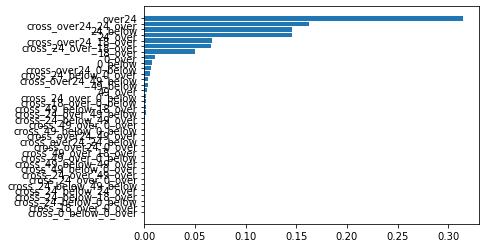

In [39]:
f_importances(model.feature_importances_,  X_catagory.columns)

In [36]:
ori_columns = X_catagory.columns
visited = []
for i in ori_columns:
    for j in ori_columns:
        if j in visited or i == j:
            continue
        name = 'cross_'+str(i)+'_'+str(j)
        X_catagory[name] = X_catagory[i]*X_catagory[j]
    visited.append(i)

In [91]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
X = output_array
Y = train_y

test_ratio = 0.3
X_train = X [math.ceil(len(X)*test_ratio) :]
X_test = X [ : math.ceil(len(X)*test_ratio)]

y_train = Y[math.ceil(len(X)*test_ratio) :]
y_test = Y[ : math.ceil(len(X)*test_ratio)]

# ros = RandomOverSampler(random_state = 40)
# X_train, y_train = ros.fit_resample(X_train, y_train)

model = XGBClassifier( booster='gbtree', max_depth=10,                
                  n_estimators=10, n_jobs=4, nthread=-1, eval_metric='mlogloss',
                  random_state=27,  tree_method='approx',
                  validate_parameters=1, verbosity=None)

model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
precision, recall, f1, _ = score(y_test, y_test_pred)
print ( "precision(0, 1, 2):" ,precision )    
print ( "recall score(0, 1, 2):" ,recall )
Y_train_pre = model.predict(X_train)
print('training score :' , accuracy_score(y_train, Y_train_pre))
print('testing score :' , accuracy_score(y_test, y_test_pred))


C:\Users\kevin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\

precision(0, 1, 2): [0.56770802 0.         0.47439401]
recall score(0, 1, 2): [0.94107572 0.         0.13337532]
training score : 0.5331252539160855
testing score : 0.561797019347844


In [92]:
confusion_matrix(y_train, Y_train_pre)

array([[406569,      0,  31389],
       [183076,      0,      2],
       [169361,      0,  31725]], dtype=int64)

In [93]:
confusion_matrix(y_test, y_test_pred)

array([[187355,      0,  11731],
       [ 73868,      0,      0],
       [ 68797,      0,  10588]], dtype=int64)

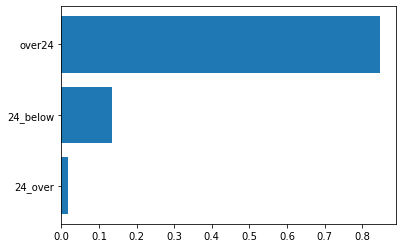

In [94]:
f_importances(model.feature_importances_, X_catagory.columns)

In [74]:
from keras.models import Sequential 
from keras.layers import Embedding , Dense, Dropout, Flatten
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GroupKFold, KFold

import tensorflow as tf
import tensorflow.keras.models as M
import tensorflow.keras.backend as K
from tensorflow.keras import metrics

In [263]:
X_catagory= X_catagory.drop(columns=['over24'])

In [273]:
X_catagory

,24_below,24_over,49_below,49_over,18_over,0_below,0_over,cross_over24_24_below,cross_over24_24_over,cross_over24_49_below,...,cross_49_below_49_over,cross_49_below_18_over,cross_49_below_0_below,cross_49_below_0_over,cross_49_over_18_over,cross_49_over_0_below,cross_49_over_0_over,cross_18_over_0_below,cross_18_over_0_over,cross_0_below_0_over
0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174456,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1174457,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1174458,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1174459,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(len(X_catagory.columns), 3, input_length=len(X_catagory.columns)))
model.add(Flatten())
model.add(Dense(36))
model.add(Dense(3))
model.compile('rmsprop', 'mse')
output_array = model.predict(X_catagory.values)

In [265]:
output_array.shape

(1174461, 3)

In [266]:
output_array.T[0]

array([-0.08242694, -0.08242694, -0.08242694, ..., -0.07552947,
       -0.07552947, -0.12455549], dtype=float32)

In [267]:
X_refactor['embedding_0'] = output_array.T[0]
X_refactor['embedding_1'] = output_array.T[1]
X_refactor['embedding_2'] = output_array.T[2]

In [268]:
X_refactor_with_label = X_refactor.copy()

X_refactor_with_label['label'] = train_y

In [269]:
X_refactor_with_label['embedding_0'] = (X_refactor_with_label['embedding_0']*100).apply(np.ceil)
X_refactor_with_label['embedding_1'] = (X_refactor_with_label['embedding_1']*100).apply(np.ceil)
X_refactor_with_label['embedding_2'] = (X_refactor_with_label['embedding_2']*100).apply(np.ceil)

<AxesSubplot:title={'center':'EB0'}, xlabel='embedding_0'>

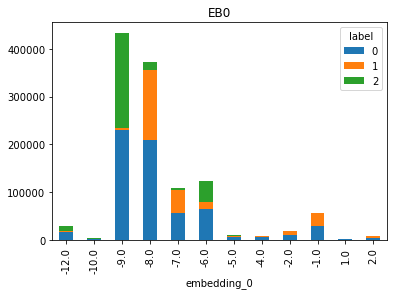

In [270]:
pd.crosstab(X_refactor_with_label['embedding_0'], X_refactor_with_label['label']).plot(kind='bar', stacked = True, title = "EB0")

<AxesSubplot:title={'center':'EB0'}, xlabel='embedding_1'>

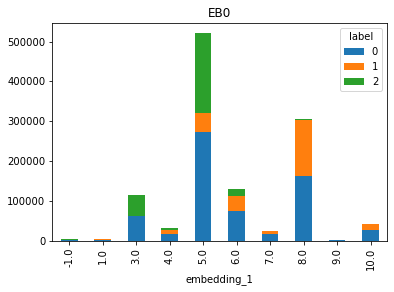

In [271]:
pd.crosstab(X_refactor_with_label['embedding_1'], X_refactor_with_label['label']).plot(kind='bar', stacked = True, title = "EB0")

<AxesSubplot:title={'center':'EB0'}, xlabel='embedding_2'>

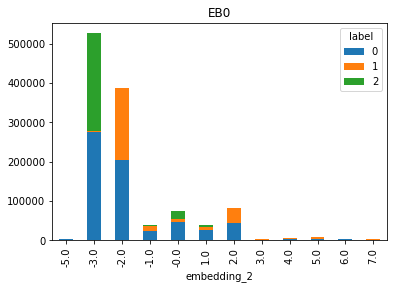

In [272]:
pd.crosstab(X_refactor_with_label['embedding_2'], X_refactor_with_label['label']).plot(kind='bar', stacked = True, title = "EB0")

In [136]:
X_refactor

,0,18,24,49,over24,24_below,24_over,49_below,49_over,18_over,0_below,0_over,embedding_0,embedding_1,embedding_2
0,0.853843,1.419680,0.746444,0.349136,1,0,1,0,0,1,0,0,-0.036946,-0.001602,-0.000881
1,1.128771,1.209400,0.974448,0.349136,1,0,1,0,0,1,0,0,-0.036946,-0.001602,-0.000881
2,0.760572,0.628468,0.726897,0.456513,1,0,1,0,0,1,0,0,-0.036946,-0.001602,-0.000881
3,1.114048,0.774606,0.829814,1.077650,1,0,1,0,0,1,0,0,-0.036946,-0.001602,-0.000881
4,0.448862,1.535638,1.032305,0.349136,1,0,1,0,0,1,0,0,-0.036946,-0.001602,-0.000881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174456,-0.129721,0.919751,0.634108,0.672387,1,0,1,0,0,1,1,0,-0.040742,-0.013797,0.023727
1174457,1.884997,0.919751,1.291386,0.290867,1,0,1,0,0,1,0,0,-0.036946,-0.001602,-0.000881
1174458,0.328971,-1.582198,0.846840,1.073458,1,0,1,0,0,0,0,0,-0.055520,0.022654,0.030602
1174459,0.328971,-1.582198,0.714985,1.131464,1,0,1,0,0,0,0,0,-0.055520,0.022654,0.030602


In [132]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
X = X_refactor[]
Y = train_y

test_ratio = 0.3
X_train = X [math.ceil(len(X)*test_ratio) :]
X_test = X [ : math.ceil(len(X)*test_ratio)]

y_train = Y[math.ceil(len(X)*test_ratio) :]
y_test = Y[ : math.ceil(len(X)*test_ratio)]

# ros = RandomOverSampler(random_state = 40)
# X_train, y_train = ros.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)

model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
precision, recall, f1, _ = score(y_test, y_test_pred)
print ( "precision(0, 1, 2):" ,precision )    
print ( "recall score(0, 1, 2):" ,recall )
Y_train_pre = model.predict(X_train)
print('training score :' , accuracy_score(y_train, Y_train_pre))
print('testing score :' , accuracy_score(y_test, y_test_pred))


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kevin\AppData\Local\Temp/ipykernel_5904/169731644.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


precision(0, 1, 2): [0.59789447 0.53834519 0.5162074 ]
recall score(0, 1, 2): [0.78049185 0.32281908 0.3131448 ]


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


training score : 0.5696940356784029
testing score : 0.5792432855857569


In [133]:
confusion_matrix(y_train, Y_train_pre)

array([[337870,  45146,  54942],
       [121381,  61571,    126],
       [132103,     66,  68917]], dtype=int64)

In [134]:
confusion_matrix(y_test, y_test_pred)

array([[155385,  20428,  23273],
       [ 49997,  23846,     25],
       [ 54505,     21,  24859]], dtype=int64)

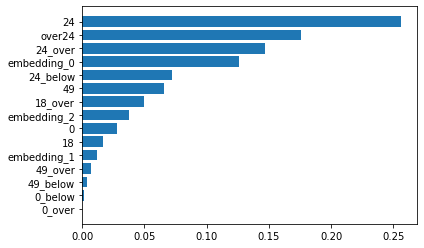

In [137]:
f_importances(model.feature_importances_, X_refactor.columns)

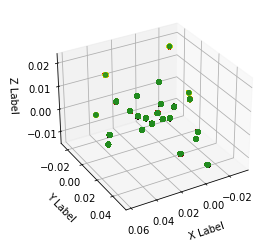

In [98]:

from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X_reduced = PCA(n_components = 3).fit_transform(output_array)

col = ['red','yellow','forestgreen']

fig = plt.figure()
ax = fig.add_subplot(111,projection ='3d')

#X_reduced = X_reduced [0:1476]

# add zaxis for the third dimension.
for y , color in zip([0,1,2], col):
    xs = X_reduced[Y[0] == y].T[0]
    ys = X_reduced[Y[0] == y].T[1]
    zs = X_reduced[Y[0] == y].T[2]
    ax.scatter(xs, ys, zs, c = color,  marker='o')

ax.view_init(30, 60)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()


In [98]:
Y.value_counts()

0    324852
2    277649
1      2434
dtype: int64

In [242]:
X_refactor=X_refactor.drop(columns=['over24','24_below','24_over'])

In [246]:
normalized_df=(train_x-train_x.mean())/train_x.std()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis().fit(normalized_df[train_x[24]>0], y= train_y[train_x[24]>0])
X_reduced = LDA.transform(normalized_df[train_x[24]>0])


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [247]:
X_reduced

array([[ 0.48044797,  0.66378293],
       [ 0.38671559, -0.47168583],
       [ 0.43651389, -0.02189331],
       ...,
       [ 1.00277411, -1.49851855],
       [ 0.22705496, -0.82632638],
       [ 0.39884443, -0.57245199]])

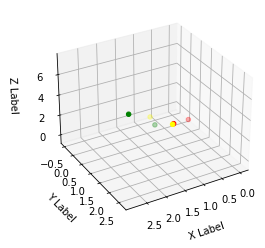

In [251]:
col = ['red','yellow','green']

fig = plt.figure()
ax = fig.add_subplot(111,projection ='3d')

#X_reduced = X_reduced [0:1476]

# add zaxis for the third dimension.
for y , color in zip([0,1,2], col):
    xs = X_reduced[ train_y[train_x[24]>0][0] == y][0]
    ys = X_reduced[ train_y[train_x[24]>0][0] == y][1]
    zs = X_reduced[ train_y[train_x[24]>0][0] == y][0]*X_reduced[ train_y[train_x[24]>0][0] == y][1]
    ax.scatter(xs, ys, zs, c = color,  marker='o')

ax.view_init(30, 60)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()


In [100]:
X_refactor['LDA1'] = X_reduced.T[0]
X_refactor['LDA2'] = X_reduced.T[1]

ValueError: Length of values (327286) does not match length of index (1174461)

In [146]:
X_reduced.T

array([[-1.05740817, -1.29721839, -0.96690995, ..., -0.94172684,
        -0.81818934,  1.26814334],
       [ 0.96500758, -0.59009512, -0.30408545, ..., -2.01975162,
        -2.10402368, -0.2869734 ]])

In [202]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

X = X_refactor[X_refactor[24]>view[24][1]].reset_index(drop = True)
Y = train_y[X_refactor[24]>view[24][1]].reset_index(drop = True)

X['LDA1'] = X_reduced.T[0]
X['LDA2'] = X_reduced.T[1]
X['LDA3'] = X_reduced.T[0]*X_reduced.T[1]



test_ratio = 0.3
X_train = X [math.ceil(len(X)*test_ratio) :]
X_test = X [ : math.ceil(len(X)*test_ratio)]

y_train = Y[math.ceil(len(X)*test_ratio) :]
y_test = Y[ : math.ceil(len(X)*test_ratio)]

# ros = RandomOverSampler(random_state = 40)
# X_train, y_train = ros.fit_resample(X_train, y_train)

model = XGBClassifier( booster='gbtree', max_depth=5,                
                  n_estimators=100, n_jobs=4, nthread=-1, eval_metric='mlogloss',
                  random_state=27,  tree_method='exact',
                  validate_parameters=1, verbosity=None)

model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
precision, recall, f1, _ = score(y_test, y_test_pred)
print ( "precision(0, 1, 2):" ,precision )    
print ( "recall score(0, 1, 2):" ,recall )
Y_train_pre = model.predict(X_train)
print('training score :' , accuracy_score(y_train, Y_train_pre))
print('testing score :' , accuracy_score(y_test, y_test_pred))


C:\Users\kevin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


precision(0, 1, 2): [0.62854128 0.57457301 0.5823389 ]
recall score(0, 1, 2): [0.79276346 0.37530932 0.28638498]
training score : 0.6299552509857826
testing score : 0.613503611185897


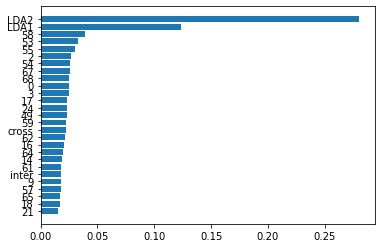

In [204]:
from matplotlib import pyplot as plt
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(model.feature_importances_, X_refactor.columns)

In [153]:
cross = X_refactor.cross

In [158]:
X_refactor['cross_diff'] = cross - cross.shift(1)
X_refactor['cross_ratio'] = cross / cross.shift(1)

0               NaN
1          0.079604
2         -0.008377
3          0.562411
4         -0.533834
             ...   
1174456   -0.401912
1174457   -0.050745
1174458    0.533426
1174459   -0.100068
1174460   -0.880738
Name: cross, Length: 1174461, dtype: float64

In [162]:
max(cross)

77.4917138409907

In [175]:
test =  (cross-min(cross)+1) / (cross.shift(1)-min(cross)+1)

In [178]:
test[0] = test[1] 

In [181]:
sum(test)/len(test)

1.0001534947092277

In [190]:
Y.value_counts()

0    312192
1    254512
2      2822
dtype: int64

In [213]:
Y[X_reduced.T[0]*X_reduced.T[1] > (sum(X_reduced.T[0]*X_reduced.T[1])/len(X_reduced.T[0]))].value_counts()

0    129504
1     98604
2      1451
dtype: int64